## YOLOv8 학습 프로세스 (커스텀 데이터)

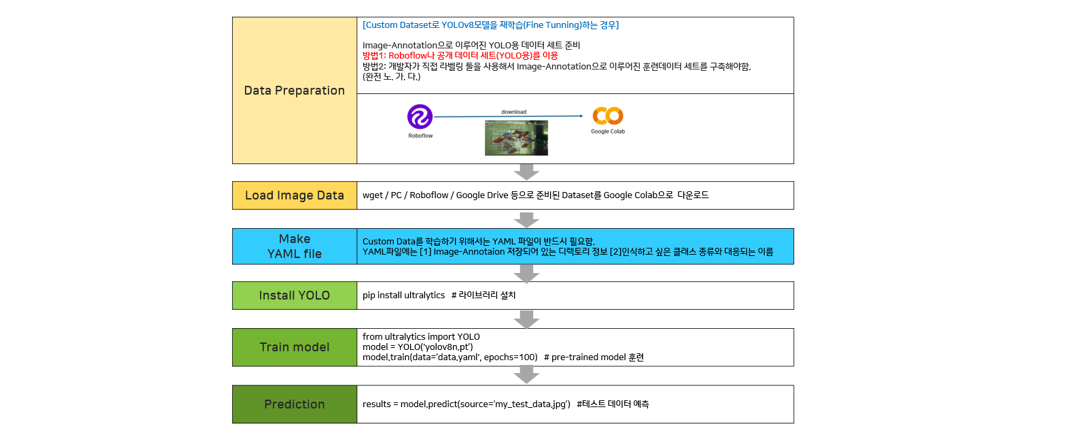

# 데이터세트 업로드

images_split.zip 파일을 /content 위치에 drag&drop하여 업로드한다.

In [ ]:
%pwd

'/content'

In [ ]:
!unzip /content/PPE_Detection.v1i.yolov8.1.zip -d dataset/

Archive:  /content/PPE_Detection.v1i.yolov8.1.zip
   creating: dataset/PPE Detection.v1i.yolov8/
   creating: dataset/PPE Detection.v1i.yolov8/test/
   creating: dataset/PPE Detection.v1i.yolov8/test/images/
  inflating: dataset/PPE Detection.v1i.yolov8/test/images/00048_jpg.rf.5a6e0568c1426629205de99d59be1069.jpg  
  inflating: dataset/PPE Detection.v1i.yolov8/test/images/00100_jpg.rf.d4c4148963c9e744fcf3217afedf056c.jpg  
  inflating: dataset/PPE Detection.v1i.yolov8/test/images/00121_jpg.rf.a6f64b4c30dc48a69b11e97bfd54792a.jpg  
  inflating: dataset/PPE Detection.v1i.yolov8/test/images/00121_jpg.rf.c6410bd70f7a3e38ac23c86941773426.jpg  
  inflating: dataset/PPE Detection.v1i.yolov8/test/images/00125_jpg.rf.685a17e5bb044471c12f5c1c357b55b3.jpg  
  inflating: dataset/PPE Detection.v1i.yolov8/test/images/00126_jpg.rf.53cd0ebdc646f835242bbdae0f077321.jpg  
  inflating: dataset/PPE Detection.v1i.yolov8/test/images/00126_jpg.rf.9dc0786844357f91d3d0a63308611501.jpg  
  inflating: dataset/P

# yaml 파일 설정
* 데이터셋 위치 알려주는 config file

In [ ]:
%cat /content/dataset/PPE_Detection.v1i.yolov8/data.yaml

train: /content/dataset/PPE_Detection.v1i.yolov8/train/images
val: /content/dataset/PPE_Detection.v1i.yolov8/valid/images
test: /content/dataset/PPE_Detection.v1i.yolov8/test/images

nc: 4
names: ['boots', 'helmet', 'human', 'vest']




```
* train,val,test 경로가 나의 작업 환경과 맞지 않아 수정이 필요

* nc: name of class 객체 인식할 클래수 개수

* name: 클래스 이름


```

### custom data에 대한 yaml 파일 만들기

In [ ]:
%pip install PyYAML # 파이썬에서 YAML 파일을 사용하기 위한 라이브러리

In [ ]:
# train:에는 학습 이미지 절대경로
# val:에는 검증 이미지 절대경로
# nc:는 클래스 수 (여기서는 예시로 1개)
# names:는 클래스 이름

import yaml

data = { 'train' : '/content/dataset/PPE_Detection.v1i.yolov8/train/images',
         'val' : '/content/dataset/PPE_Detection.v1i.yolov8/train/images',
         'test' : '/content/dataset/PPE_Detection.v1i.yolov8/train/images',
         'names' : ['car'],
         'nc' : 4 } #detection 하고 싶은 클래스 개수

with open('/content/dataset/PPE_Detection.v1i.yolov8/data.yaml', 'w') as f:  #저장
  yaml.dump(data, f)


In [ ]:
!cat /content/dataset/PPE_Detection.v1i.yolov8/data.yaml

names:
- car
nc: 4
test: /content/dataset/PPE_Detection.v1i.yolov8/train/images
train: /content/dataset/PPE_Detection.v1i.yolov8/train/images
val: /content/dataset/PPE_Detection.v1i.yolov8/train/images


# YOLOv8 설치

*  https://github.com/ultralytics/ultralytics

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 128.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
import ultralytics

ultralytics.checks()

Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 42.0/112.6 GB disk)


# Train (Python version)

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov5n.pt')  # 사전 학습된 yolov8 나노 버전 모델 다운

# 다른 버전도 다운 받아서 시도.

PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 5.31M/5.31M [00:00<00:00, 62.0MB/s]


In [ ]:
print(type(model.names), len(model.names))

print(model.names) # MS COCO에서 정의된 클래스 개수와 종류 확인할 수 있음.(총 80개)

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

In [ ]:
# /content/runs/이하의 폴더를 지우고 싶다면...

# !rm -rf /content/runs/

In [ ]:
# #훈련데이터 있는 위치 알려줌
# #imgsz = 학습을 위한 목표 이미지 크기입니다.
# #모든 이미지는 모델에 입력되기 전에 이 크기로 조정됩니다.
# #모델 정확도와 계산 복잡도에 영향을 줍니다.

# from ultralytics import YOLO

# # 사전 학습된 모델 불러오기
# model = YOLO('yolov8n.pt')  # yolov8n: Nano 모델 (가볍고 빠름)

# # 학습 시작
# model.train(
#     data='/content/dataset/data.yaml',  # 아까 만든 data.yaml 파일
#     epochs=100,         # 학습 횟수 (조정 가능)
#     imgsz=640,         # 입력 이미지 크기 (640 권장)
#     batch=16,          # 배치 사이즈 (GPU 메모리에 따라 조정)
#     patience=20,       # 조기 종료 기준 (val loss 향상 없을 때)
#     name='train',  # 결과 저장 폴더 이름
#     pretrained=True,    # COCO 사전학습된 가중치로 초기화
#     augment=True          # 데이터 증강 활성화
# )

from ultralytics import YOLO# 사전 학습된 YOLOv8n 모델 불러오기
model = YOLO('yolov8n.pt')  # yolov8n: Nano 모델 (가볍고 빠름)# 로봇 시나리오를 고려한 데이터 증강 파라미터를 적용하여 학습 시작
model.train(
    data='/content/dataset/data.yaml',  # 아까 만든 data.yaml 파일 경로
    epochs=100,                  # 학습 횟수 (조정 가능)
    imgsz=640,                   # 입력 이미지 크기 (640 권장)
    batch=16,                    # 배치 사이즈 (GPU 메모리에 따라 조정)
    patience=20,                 # 조기 종료 기준 (val loss 향상 없을 때)
    name='train',                # 결과 저장 폴더 이름
    pretrained=True,             # COCO 사전학습된 가중치로 초기화
    augment=True,                # 데이터 증강 활성화    # --- 로봇 시나리오를 위한 추천 데이터 증강 파라미터 ---
    degrees=5.0,                # 이미지 회전 (최대 +/- 10도)
    translate=0.1,               # 이미지 이동 (최대 +/- 10% 비율)
    perspective=0.0002,          # 이미지 원근 변환 (약간의 왜곡)
    scale=0.5,                   # 이미지 스케일 (0.5 ~ 2.0배 사이)
    shear=5.0                    # 이미지 전단 변환 (최대 +/- 5도 기울임)
)

Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=5.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0002, plots=True, pose=12

100%|██████████| 755k/755k [00:00<00:00, 13.7MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,628 parameters, 3,011,612 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 64.4MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1278.4±658.7 MB/s, size: 63.2 KB)


train: Scanning /content/dataset/PPE_Detection.v1i.yolov8/train/labels... 1467 images, 50 backgrounds, 0 corrupt: 100%|██████████| 1467/1467 [00:00<00:00, 1546.04it/s]

train: /content/dataset/PPE_Detection.v1i.yolov8/train/images/Video2_167_jpg.rf.4dcb02a9db3f3798e67b6dc5e1aab32e.jpg: 1 duplicate labels removed
train: /content/dataset/PPE_Detection.v1i.yolov8/train/images/Video2_167_jpg.rf.6940dab78539f0859b7f21702759d117.jpg: 1 duplicate labels removed
train: New cache created: /content/dataset/PPE_Detection.v1i.yolov8/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1280.4±1013.8 MB/s, size: 62.6 KB)


val: Scanning /content/dataset/PPE_Detection.v1i.yolov8/train/labels.cache... 1467 images, 50 backgrounds, 0 corrupt: 100%|██████████| 1467/1467 [00:00<?, ?it/s]

train: /content/dataset/PPE_Detection.v1i.yolov8/train/images/Video2_167_jpg.rf.4dcb02a9db3f3798e67b6dc5e1aab32e.jpg: 1 duplicate labels removed
train: /content/dataset/PPE_Detection.v1i.yolov8/train/images/Video2_167_jpg.rf.6940dab78539f0859b7f21702759d117.jpg: 1 duplicate labels removed


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       2.1G      1.298      2.029      1.394         99        640: 100%|██████████| 92/92 [00:11<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.57it/s]


                   all       1467       6403      0.824      0.672      0.807      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.63G      1.212      1.196       1.29         74        640: 100%|██████████| 92/92 [00:08<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  6.20it/s]


                   all       1467       6403      0.882      0.826      0.901      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.63G      1.194      1.123      1.287         89        640: 100%|██████████| 92/92 [00:08<00:00, 10.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  6.48it/s]


                   all       1467       6403      0.889      0.826      0.904      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.63G      1.175       1.03      1.275         79        640: 100%|██████████| 92/92 [00:08<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  6.88it/s]


                   all       1467       6403      0.853      0.812      0.877      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.65G       1.15     0.9629      1.254        107        640: 100%|██████████| 92/92 [00:08<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.28it/s]


                   all       1467       6403       0.91       0.85      0.928      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.67G      1.129      0.907       1.24         72        640: 100%|██████████| 92/92 [00:08<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.44it/s]


                   all       1467       6403      0.919      0.865      0.938       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.67G      1.124     0.8928      1.249         84        640: 100%|██████████| 92/92 [00:08<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.35it/s]


                   all       1467       6403      0.922      0.871      0.943      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.67G      1.088     0.8218      1.216         77        640: 100%|██████████| 92/92 [00:08<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.57it/s]

                   all       1467       6403      0.932      0.887      0.949      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.67G      1.068     0.7942      1.214         78        640: 100%|██████████| 92/92 [00:08<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.42it/s]

                   all       1467       6403      0.919      0.891      0.957      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.67G      1.067      0.765      1.202         67        640: 100%|██████████| 92/92 [00:07<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.47it/s]


                   all       1467       6403      0.916      0.886      0.946      0.664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.67G      1.067     0.7622      1.203        101        640: 100%|██████████| 92/92 [00:08<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.44it/s]

                   all       1467       6403      0.941      0.893      0.961      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.67G      1.029     0.7156      1.184         85        640: 100%|██████████| 92/92 [00:08<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:05<00:00,  7.68it/s]

                   all       1467       6403      0.936      0.884      0.953      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.67G      1.048     0.7254      1.193         48        640: 100%|██████████| 92/92 [00:07<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.57it/s]

                   all       1467       6403      0.924      0.914      0.962      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.67G      1.003     0.6953      1.179         89        640: 100%|██████████| 92/92 [00:08<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.45it/s]

                   all       1467       6403      0.936      0.898      0.964      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.67G       1.03     0.6962       1.18         75        640: 100%|██████████| 92/92 [00:07<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.51it/s]

                   all       1467       6403      0.948      0.899      0.966      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.67G      1.019     0.6856      1.179         88        640: 100%|██████████| 92/92 [00:08<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.47it/s]

                   all       1467       6403      0.933       0.91      0.966      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.67G     0.9915     0.6568      1.161         77        640: 100%|██████████| 92/92 [00:08<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.54it/s]

                   all       1467       6403      0.942      0.886      0.955      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.67G     0.9851     0.6638      1.159         90        640: 100%|██████████| 92/92 [00:08<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.51it/s]

                   all       1467       6403      0.941      0.928      0.971       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.67G     0.9839     0.6471       1.16         60        640: 100%|██████████| 92/92 [00:08<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.54it/s]

                   all       1467       6403      0.956       0.93      0.976      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.67G     0.9838     0.6409      1.158        102        640: 100%|██████████| 92/92 [00:07<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.41it/s]

                   all       1467       6403      0.947      0.936      0.978       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.69G     0.9796     0.6253      1.156         69        640: 100%|██████████| 92/92 [00:08<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.53it/s]

                   all       1467       6403      0.945      0.946      0.979      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       2.7G     0.9646     0.6322      1.151         49        640: 100%|██████████| 92/92 [00:08<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.50it/s]

                   all       1467       6403      0.954      0.937      0.978      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       2.7G     0.9576     0.6139      1.145         85        640: 100%|██████████| 92/92 [00:08<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.45it/s]

                   all       1467       6403       0.95      0.937      0.981      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       2.7G      0.941      0.615      1.144        106        640: 100%|██████████| 92/92 [00:08<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.58it/s]

                   all       1467       6403      0.957      0.941       0.98       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       2.7G     0.9467      0.599      1.125         91        640: 100%|██████████| 92/92 [00:08<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.56it/s]

                   all       1467       6403      0.952      0.945       0.98      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       2.7G     0.9398     0.5938      1.133         66        640: 100%|██████████| 92/92 [00:08<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.58it/s]

                   all       1467       6403      0.965      0.949      0.985      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       2.7G     0.9532     0.6013      1.139         81        640: 100%|██████████| 92/92 [00:08<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.58it/s]

                   all       1467       6403      0.958      0.943      0.981      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       2.7G     0.9286     0.5811      1.115         75        640: 100%|██████████| 92/92 [00:07<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.50it/s]

                   all       1467       6403      0.949      0.944      0.982      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       2.7G     0.9319     0.5869      1.118         87        640: 100%|██████████| 92/92 [00:07<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.65it/s]

                   all       1467       6403      0.963      0.948      0.985      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       2.7G     0.9246     0.5751      1.117        102        640: 100%|██████████| 92/92 [00:08<00:00, 11.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.58it/s]

                   all       1467       6403      0.965      0.949      0.983      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       2.7G     0.9232     0.5872      1.118         75        640: 100%|██████████| 92/92 [00:08<00:00, 11.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.62it/s]

                   all       1467       6403       0.96      0.953      0.984      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       2.7G     0.9016     0.5626      1.106         99        640: 100%|██████████| 92/92 [00:07<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.55it/s]

                   all       1467       6403      0.962       0.95      0.986      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       2.7G     0.9049     0.5589      1.115         72        640: 100%|██████████| 92/92 [00:07<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.43it/s]

                   all       1467       6403      0.962      0.955      0.986      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       2.7G     0.9125     0.5642      1.113         97        640: 100%|██████████| 92/92 [00:08<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.50it/s]

                   all       1467       6403       0.96       0.96      0.986      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       2.7G     0.9142     0.5643      1.118         93        640: 100%|██████████| 92/92 [00:08<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:05<00:00,  7.70it/s]

                   all       1467       6403      0.969      0.957      0.986      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       2.7G     0.9141     0.5641      1.115         66        640: 100%|██████████| 92/92 [00:08<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.58it/s]

                   all       1467       6403      0.962      0.956      0.986      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       2.7G     0.8787     0.5552      1.094        107        640: 100%|██████████| 92/92 [00:08<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.58it/s]

                   all       1467       6403      0.969      0.955      0.987      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       2.7G     0.8903     0.5422      1.105         91        640: 100%|██████████| 92/92 [00:08<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.46it/s]

                   all       1467       6403      0.962      0.962      0.988      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       2.7G     0.8865     0.5411        1.1         73        640: 100%|██████████| 92/92 [00:08<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.59it/s]

                   all       1467       6403       0.97      0.964      0.988      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       2.7G     0.8951     0.5442      1.101         76        640: 100%|██████████| 92/92 [00:08<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.44it/s]

                   all       1467       6403      0.968      0.968      0.989      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       2.7G     0.8811     0.5329      1.092         94        640: 100%|██████████| 92/92 [00:08<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.43it/s]

                   all       1467       6403      0.975      0.962      0.989      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       2.7G     0.8769     0.5265      1.095         67        640: 100%|██████████| 92/92 [00:07<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:05<00:00,  7.70it/s]

                   all       1467       6403      0.974      0.959      0.987      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       2.7G     0.8775     0.5269      1.089         82        640: 100%|██████████| 92/92 [00:08<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.57it/s]

                   all       1467       6403      0.972      0.972       0.99      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       2.7G     0.8707      0.525      1.094         68        640: 100%|██████████| 92/92 [00:07<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.54it/s]

                   all       1467       6403       0.97      0.968       0.99      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       2.7G     0.8608     0.5191      1.082         80        640: 100%|██████████| 92/92 [00:08<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.43it/s]

                   all       1467       6403      0.971       0.97      0.989       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       2.7G     0.8623     0.5154      1.086        128        640: 100%|██████████| 92/92 [00:07<00:00, 11.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.57it/s]

                   all       1467       6403      0.973      0.973      0.991       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       2.7G     0.8454     0.4951      1.078         92        640: 100%|██████████| 92/92 [00:08<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.47it/s]

                   all       1467       6403      0.974      0.966       0.99      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       2.7G     0.8519     0.5037      1.081         85        640: 100%|██████████| 92/92 [00:08<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.56it/s]

                   all       1467       6403      0.977      0.968       0.99      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       2.7G     0.8459     0.5033      1.076         76        640: 100%|██████████| 92/92 [00:08<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.63it/s]

                   all       1467       6403      0.977      0.967      0.991      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       2.7G     0.8484     0.5024      1.075         85        640: 100%|██████████| 92/92 [00:08<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.55it/s]

                   all       1467       6403      0.978      0.975      0.991       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       2.7G     0.8382     0.4987      1.066         87        640: 100%|██████████| 92/92 [00:07<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.50it/s]

                   all       1467       6403      0.977      0.975      0.992       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       2.7G     0.8362     0.4979      1.068         80        640: 100%|██████████| 92/92 [00:08<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.52it/s]

                   all       1467       6403      0.976      0.972      0.991      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       2.7G     0.8358     0.4944      1.074         84        640: 100%|██████████| 92/92 [00:08<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:05<00:00,  7.73it/s]

                   all       1467       6403      0.979      0.975      0.992      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       2.7G     0.8176       0.48      1.057         68        640: 100%|██████████| 92/92 [00:08<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:05<00:00,  7.70it/s]

                   all       1467       6403      0.981      0.973      0.992      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100       2.7G     0.8436     0.4972      1.066        113        640: 100%|██████████| 92/92 [00:08<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.66it/s]

                   all       1467       6403      0.978      0.977      0.992       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100       2.7G     0.8244     0.4829      1.071         48        640: 100%|██████████| 92/92 [00:08<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.48it/s]

                   all       1467       6403      0.978      0.979      0.992      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       2.7G     0.8181      0.482      1.065         82        640: 100%|██████████| 92/92 [00:08<00:00, 11.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:05<00:00,  7.71it/s]

                   all       1467       6403      0.977      0.972      0.992      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       2.7G     0.8192     0.4838      1.063         59        640: 100%|██████████| 92/92 [00:08<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:05<00:00,  7.68it/s]

                   all       1467       6403      0.976      0.979      0.992      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       2.7G     0.8163     0.4635      1.057        107        640: 100%|██████████| 92/92 [00:08<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.57it/s]

                   all       1467       6403      0.981      0.977      0.993      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       2.7G     0.7953      0.468      1.057         71        640: 100%|██████████| 92/92 [00:08<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.55it/s]

                   all       1467       6403      0.982      0.979      0.992      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       2.7G      0.816     0.4707      1.057         79        640: 100%|██████████| 92/92 [00:08<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:05<00:00,  7.68it/s]

                   all       1467       6403      0.982      0.976      0.992      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100       2.7G     0.8049     0.4702      1.062         62        640: 100%|██████████| 92/92 [00:08<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:05<00:00,  7.75it/s]

                   all       1467       6403      0.982      0.981      0.992      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       2.7G     0.8073     0.4719      1.057         62        640: 100%|██████████| 92/92 [00:08<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.56it/s]

                   all       1467       6403      0.984      0.981      0.993      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       2.7G     0.7958      0.457      1.047         75        640: 100%|██████████| 92/92 [00:08<00:00, 11.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:05<00:00,  7.71it/s]

                   all       1467       6403      0.976      0.982      0.992       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       2.7G     0.7961     0.4608       1.05        100        640: 100%|██████████| 92/92 [00:08<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.43it/s]

                   all       1467       6403      0.984      0.977      0.992      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       2.7G     0.7949     0.4538      1.046         97        640: 100%|██████████| 92/92 [00:08<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.50it/s]

                   all       1467       6403      0.984      0.981      0.993      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100       2.7G     0.7896     0.4499      1.048        113        640: 100%|██████████| 92/92 [00:08<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.59it/s]

                   all       1467       6403      0.985      0.981      0.993      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       2.7G     0.7915      0.452      1.044         79        640: 100%|██████████| 92/92 [00:08<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.62it/s]

                   all       1467       6403      0.985      0.982      0.993      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       2.7G     0.7821      0.447      1.039         92        640: 100%|██████████| 92/92 [00:08<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.61it/s]

                   all       1467       6403      0.984      0.984      0.993      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       2.7G     0.7653     0.4394      1.034         84        640: 100%|██████████| 92/92 [00:08<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.57it/s]

                   all       1467       6403      0.987      0.985      0.993      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       2.7G     0.7907     0.4508      1.042         97        640: 100%|██████████| 92/92 [00:08<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:05<00:00,  7.70it/s]

                   all       1467       6403      0.989      0.981      0.993      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100       2.7G     0.7762     0.4507      1.045         66        640: 100%|██████████| 92/92 [00:08<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.65it/s]

                   all       1467       6403      0.986      0.984      0.994       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       2.7G     0.7814     0.4379      1.038         69        640: 100%|██████████| 92/92 [00:08<00:00, 10.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.54it/s]

                   all       1467       6403      0.986      0.986      0.993      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       2.7G     0.7733     0.4405      1.039         78        640: 100%|██████████| 92/92 [00:07<00:00, 11.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.56it/s]

                   all       1467       6403      0.986      0.984      0.993      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       2.7G     0.7519     0.4302      1.031         51        640: 100%|██████████| 92/92 [00:08<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.58it/s]

                   all       1467       6403      0.986      0.985      0.994      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       2.7G     0.7654     0.4335      1.034         94        640: 100%|██████████| 92/92 [00:08<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.65it/s]

                   all       1467       6403      0.986      0.987      0.993      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100       2.7G     0.7704      0.436      1.036         75        640: 100%|██████████| 92/92 [00:08<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.54it/s]

                   all       1467       6403      0.987      0.984      0.994      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       2.7G     0.7568     0.4279      1.032         75        640: 100%|██████████| 92/92 [00:08<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.56it/s]

                   all       1467       6403      0.989      0.986      0.994       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100       2.7G     0.7492      0.427      1.032         66        640: 100%|██████████| 92/92 [00:08<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.48it/s]

                   all       1467       6403       0.99      0.986      0.994      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       2.7G     0.7615     0.4279      1.031         78        640: 100%|██████████| 92/92 [00:08<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.53it/s]

                   all       1467       6403      0.988      0.987      0.994      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100       2.7G     0.7557     0.4351      1.029         78        640: 100%|██████████| 92/92 [00:08<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:05<00:00,  7.69it/s]

                   all       1467       6403      0.988      0.989      0.993      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       2.7G     0.7435     0.4196      1.028         83        640: 100%|██████████| 92/92 [00:08<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.57it/s]

                   all       1467       6403      0.989      0.985      0.994      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       2.7G     0.7491     0.4149      1.019         99        640: 100%|██████████| 92/92 [00:08<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.61it/s]

                   all       1467       6403      0.989      0.985      0.994      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100       2.7G     0.7394     0.4157       1.02         65        640: 100%|██████████| 92/92 [00:07<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.59it/s]

                   all       1467       6403      0.989      0.986      0.994      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100       2.7G     0.7434     0.4158      1.028         79        640: 100%|██████████| 92/92 [00:08<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.59it/s]

                   all       1467       6403      0.988       0.99      0.994      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.72G     0.7424     0.4145      1.023         88        640: 100%|██████████| 92/92 [00:08<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.57it/s]

                   all       1467       6403      0.988      0.989      0.994      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.72G     0.7427     0.4192      1.028         83        640: 100%|██████████| 92/92 [00:08<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.52it/s]

                   all       1467       6403      0.989      0.989      0.994      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.72G     0.7421     0.4146      1.018         71        640: 100%|██████████| 92/92 [00:07<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.65it/s]

                   all       1467       6403      0.991      0.988      0.994      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.72G     0.7387     0.4155      1.027         50        640: 100%|██████████| 92/92 [00:08<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.66it/s]

                   all       1467       6403       0.99      0.987      0.994      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.72G     0.7367     0.4062      1.023         90        640: 100%|██████████| 92/92 [00:08<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.58it/s]

                   all       1467       6403       0.99      0.989      0.994      0.842


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.72G     0.6909     0.3582          1         77        640: 100%|██████████| 92/92 [00:08<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.53it/s]

                   all       1467       6403      0.989      0.989      0.994      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.72G     0.7029     0.3532      1.003         46        640: 100%|██████████| 92/92 [00:07<00:00, 11.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.58it/s]

                   all       1467       6403       0.99       0.99      0.994      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.72G     0.6823     0.3447     0.9953         48        640: 100%|██████████| 92/92 [00:08<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.35it/s]

                   all       1467       6403       0.99      0.989      0.994      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.72G     0.6861      0.341     0.9832         46        640: 100%|██████████| 92/92 [00:07<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.43it/s]

                   all       1467       6403      0.991      0.989      0.994      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.72G     0.6668     0.3343     0.9849         42        640: 100%|██████████| 92/92 [00:07<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.63it/s]

                   all       1467       6403       0.99       0.99      0.994      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.72G     0.6786     0.3371     0.9944         38        640: 100%|██████████| 92/92 [00:08<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.44it/s]

                   all       1467       6403       0.99       0.99      0.994      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.72G     0.6726     0.3378     0.9926         34        640: 100%|██████████| 92/92 [00:07<00:00, 11.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.48it/s]

                   all       1467       6403       0.99       0.99      0.994      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.72G     0.6653     0.3327     0.9857         36        640: 100%|██████████| 92/92 [00:07<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.61it/s]

                   all       1467       6403      0.991       0.99      0.994      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.72G     0.6714     0.3358     0.9829         51        640: 100%|██████████| 92/92 [00:08<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.62it/s]

                   all       1467       6403      0.991      0.989      0.994      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.72G     0.6683     0.3321     0.9796         37        640: 100%|██████████| 92/92 [00:08<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:06<00:00,  7.60it/s]

                   all       1467       6403      0.991      0.989      0.994      0.856



100 epochs completed in 0.406 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.3MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.17it/s]


                   all       1467       6403      0.987      0.989      0.994      0.858
                 boots       1031       2172      0.989      0.989      0.995      0.796
                helmet       1033       1231      0.983      0.994      0.994      0.817
                 human       1080       1276      0.983      0.983      0.992      0.926
                  vest       1313       1724      0.993       0.99      0.995      0.892
Speed: 0.1ms preprocess, 1.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fd7a527bf50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

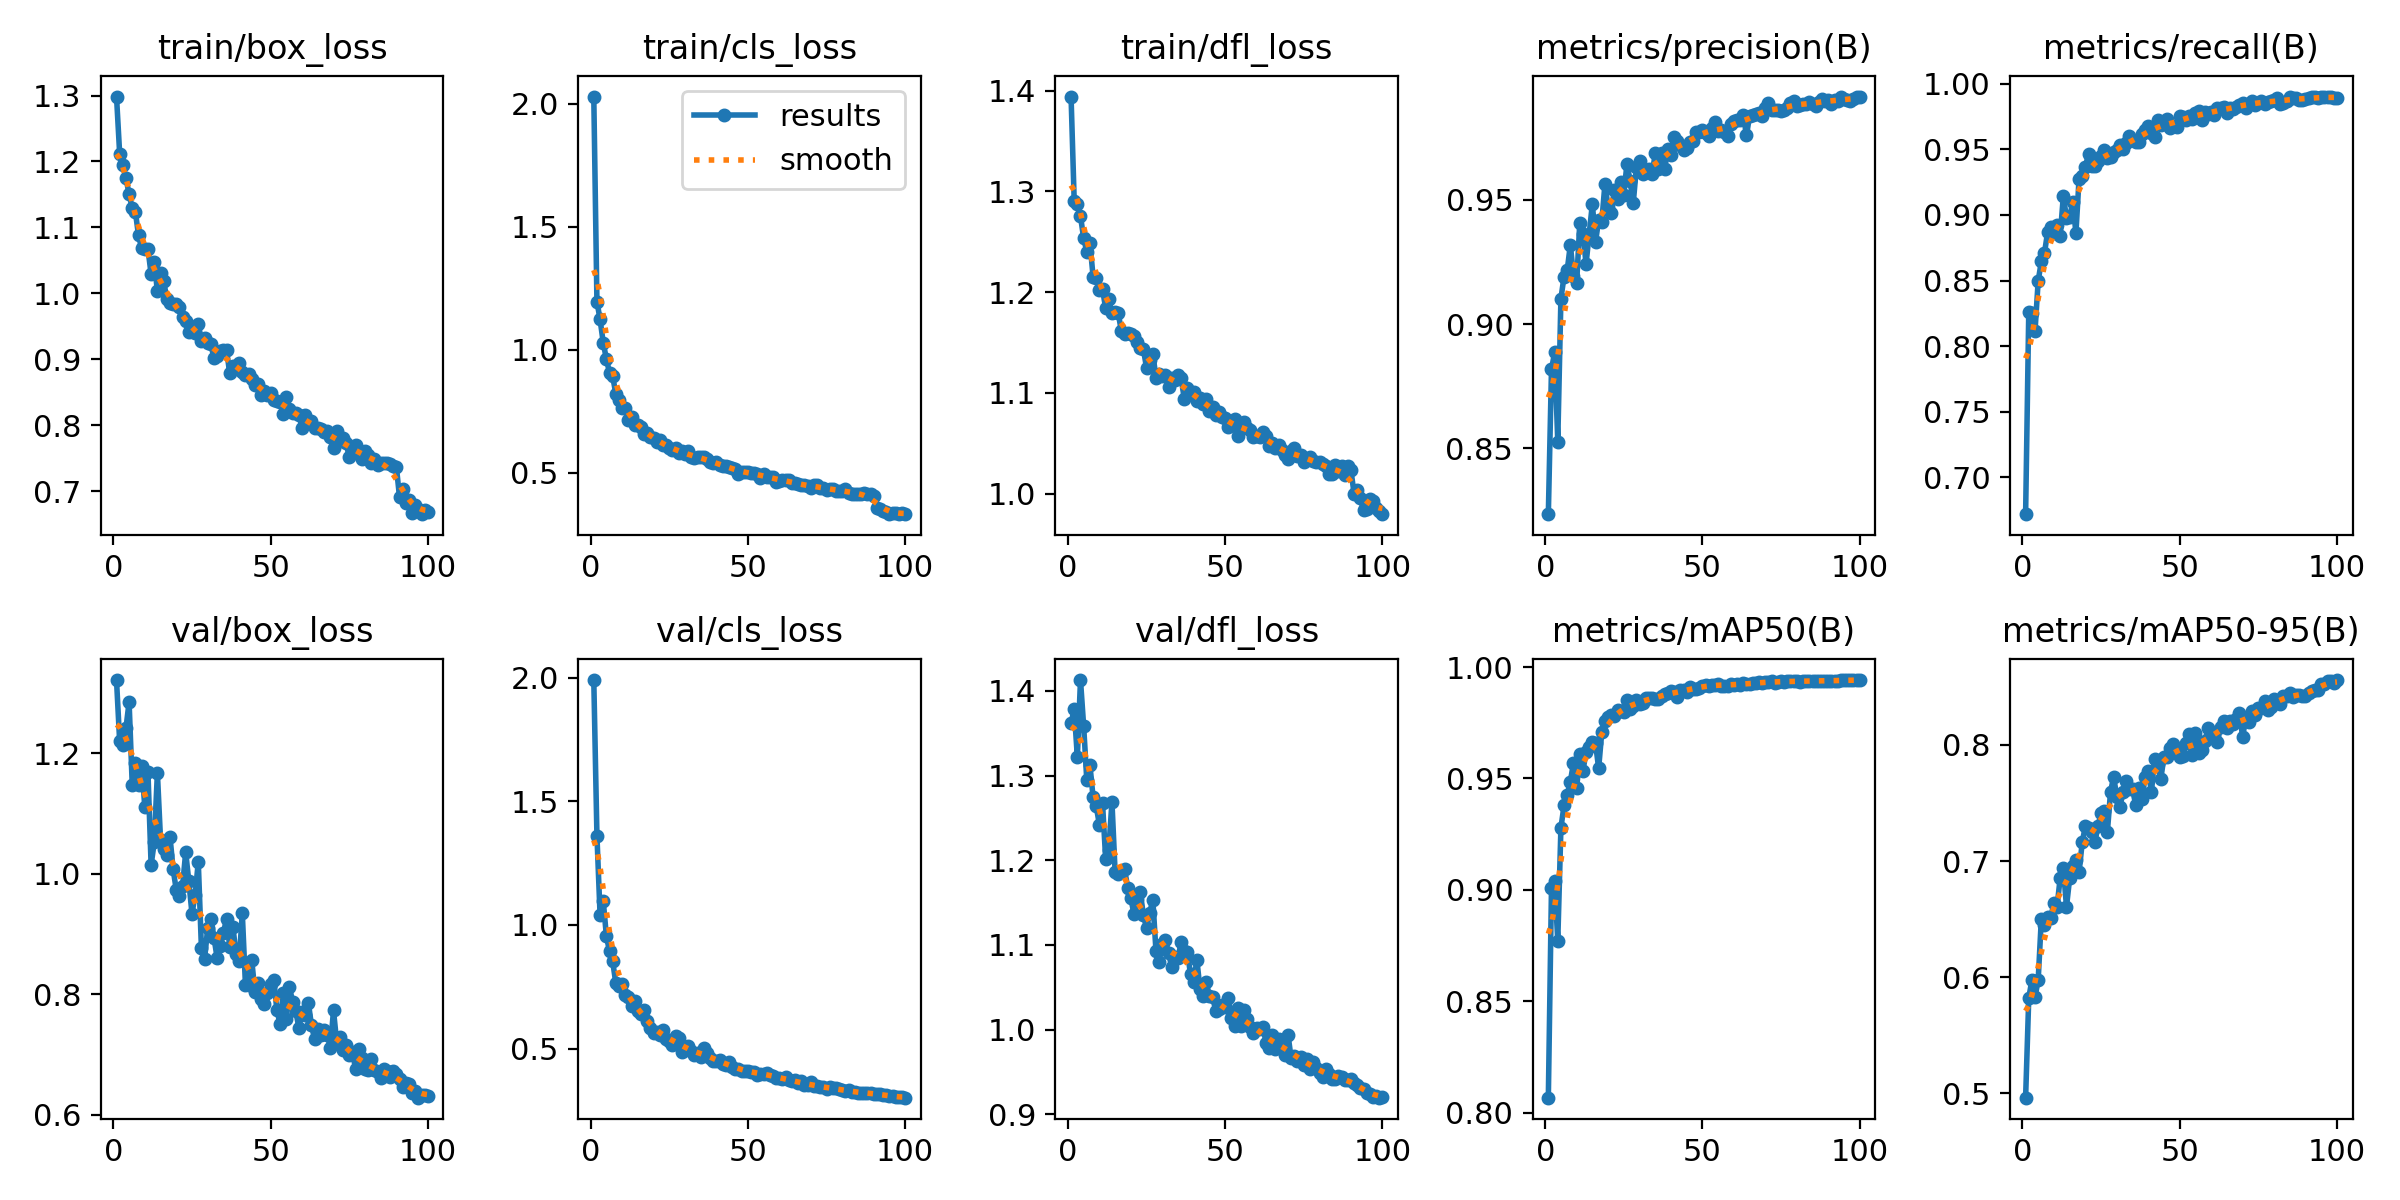

In [ ]:
from IPython.display import display, Image
Image(filename='/content/runs/detect/train3/results.png', width=1000)

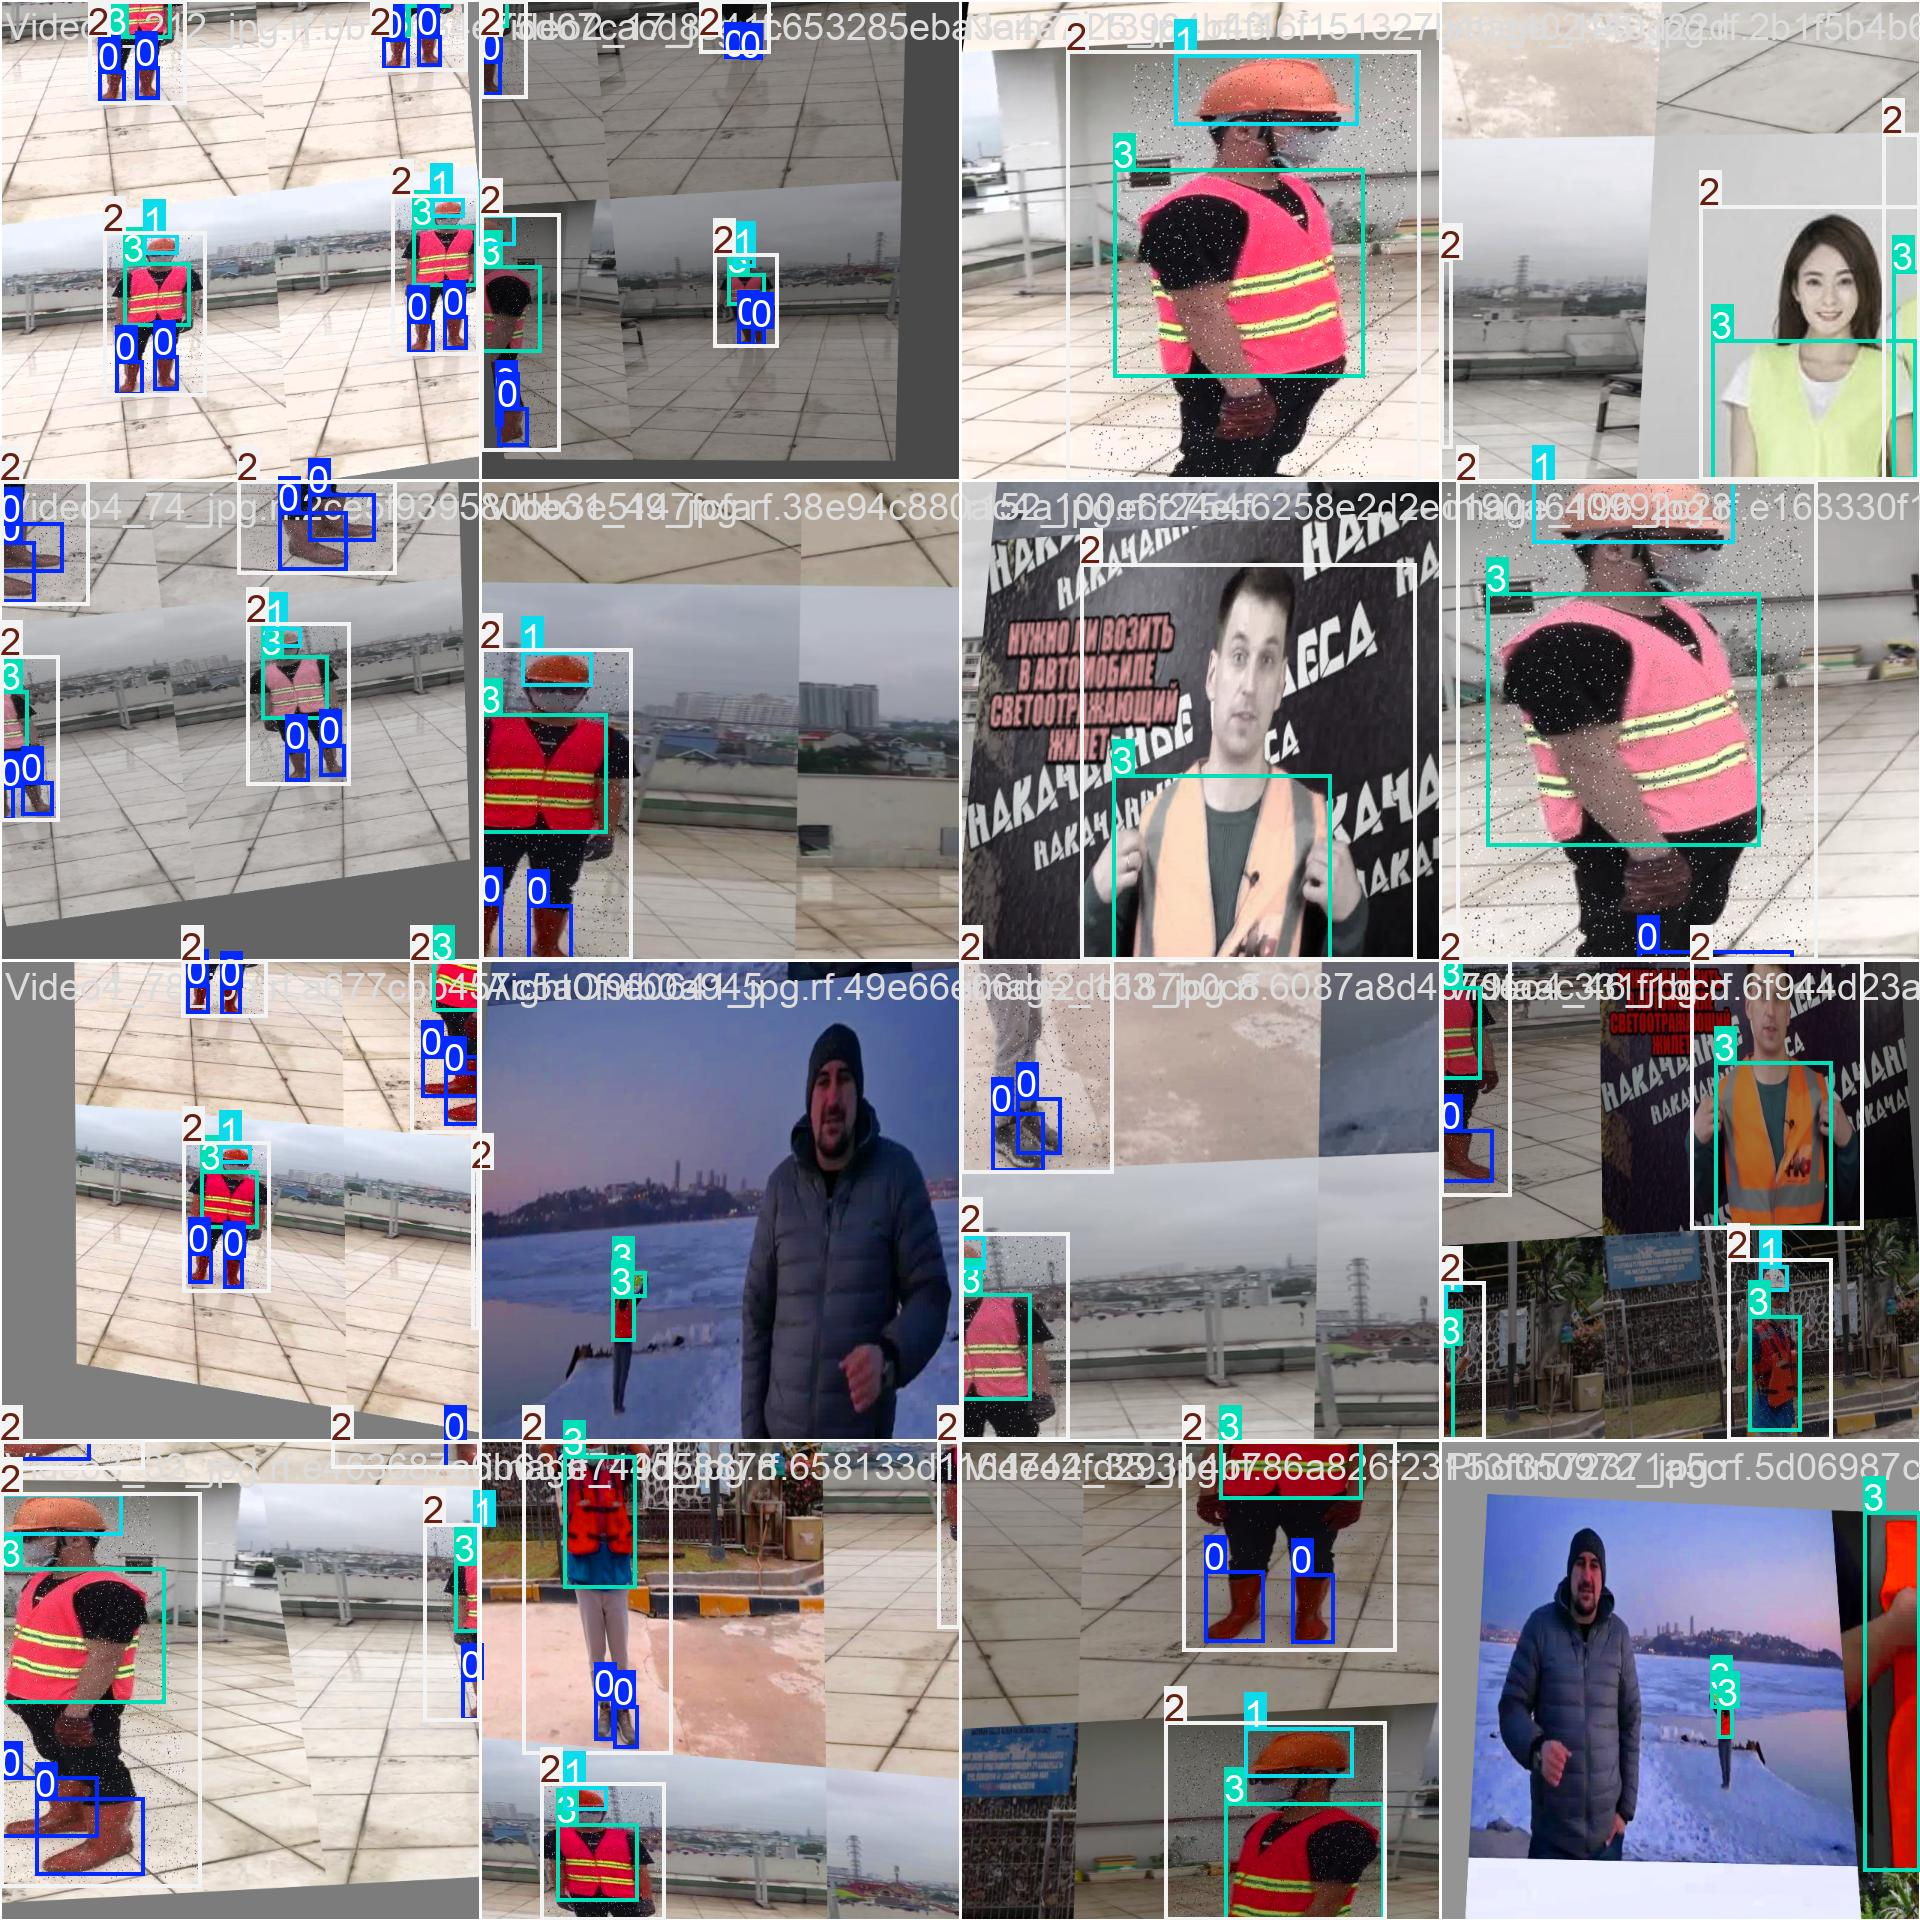

In [ ]:
Image(filename='/content/runs/detect/train3/train_batch0.jpg', width=600)

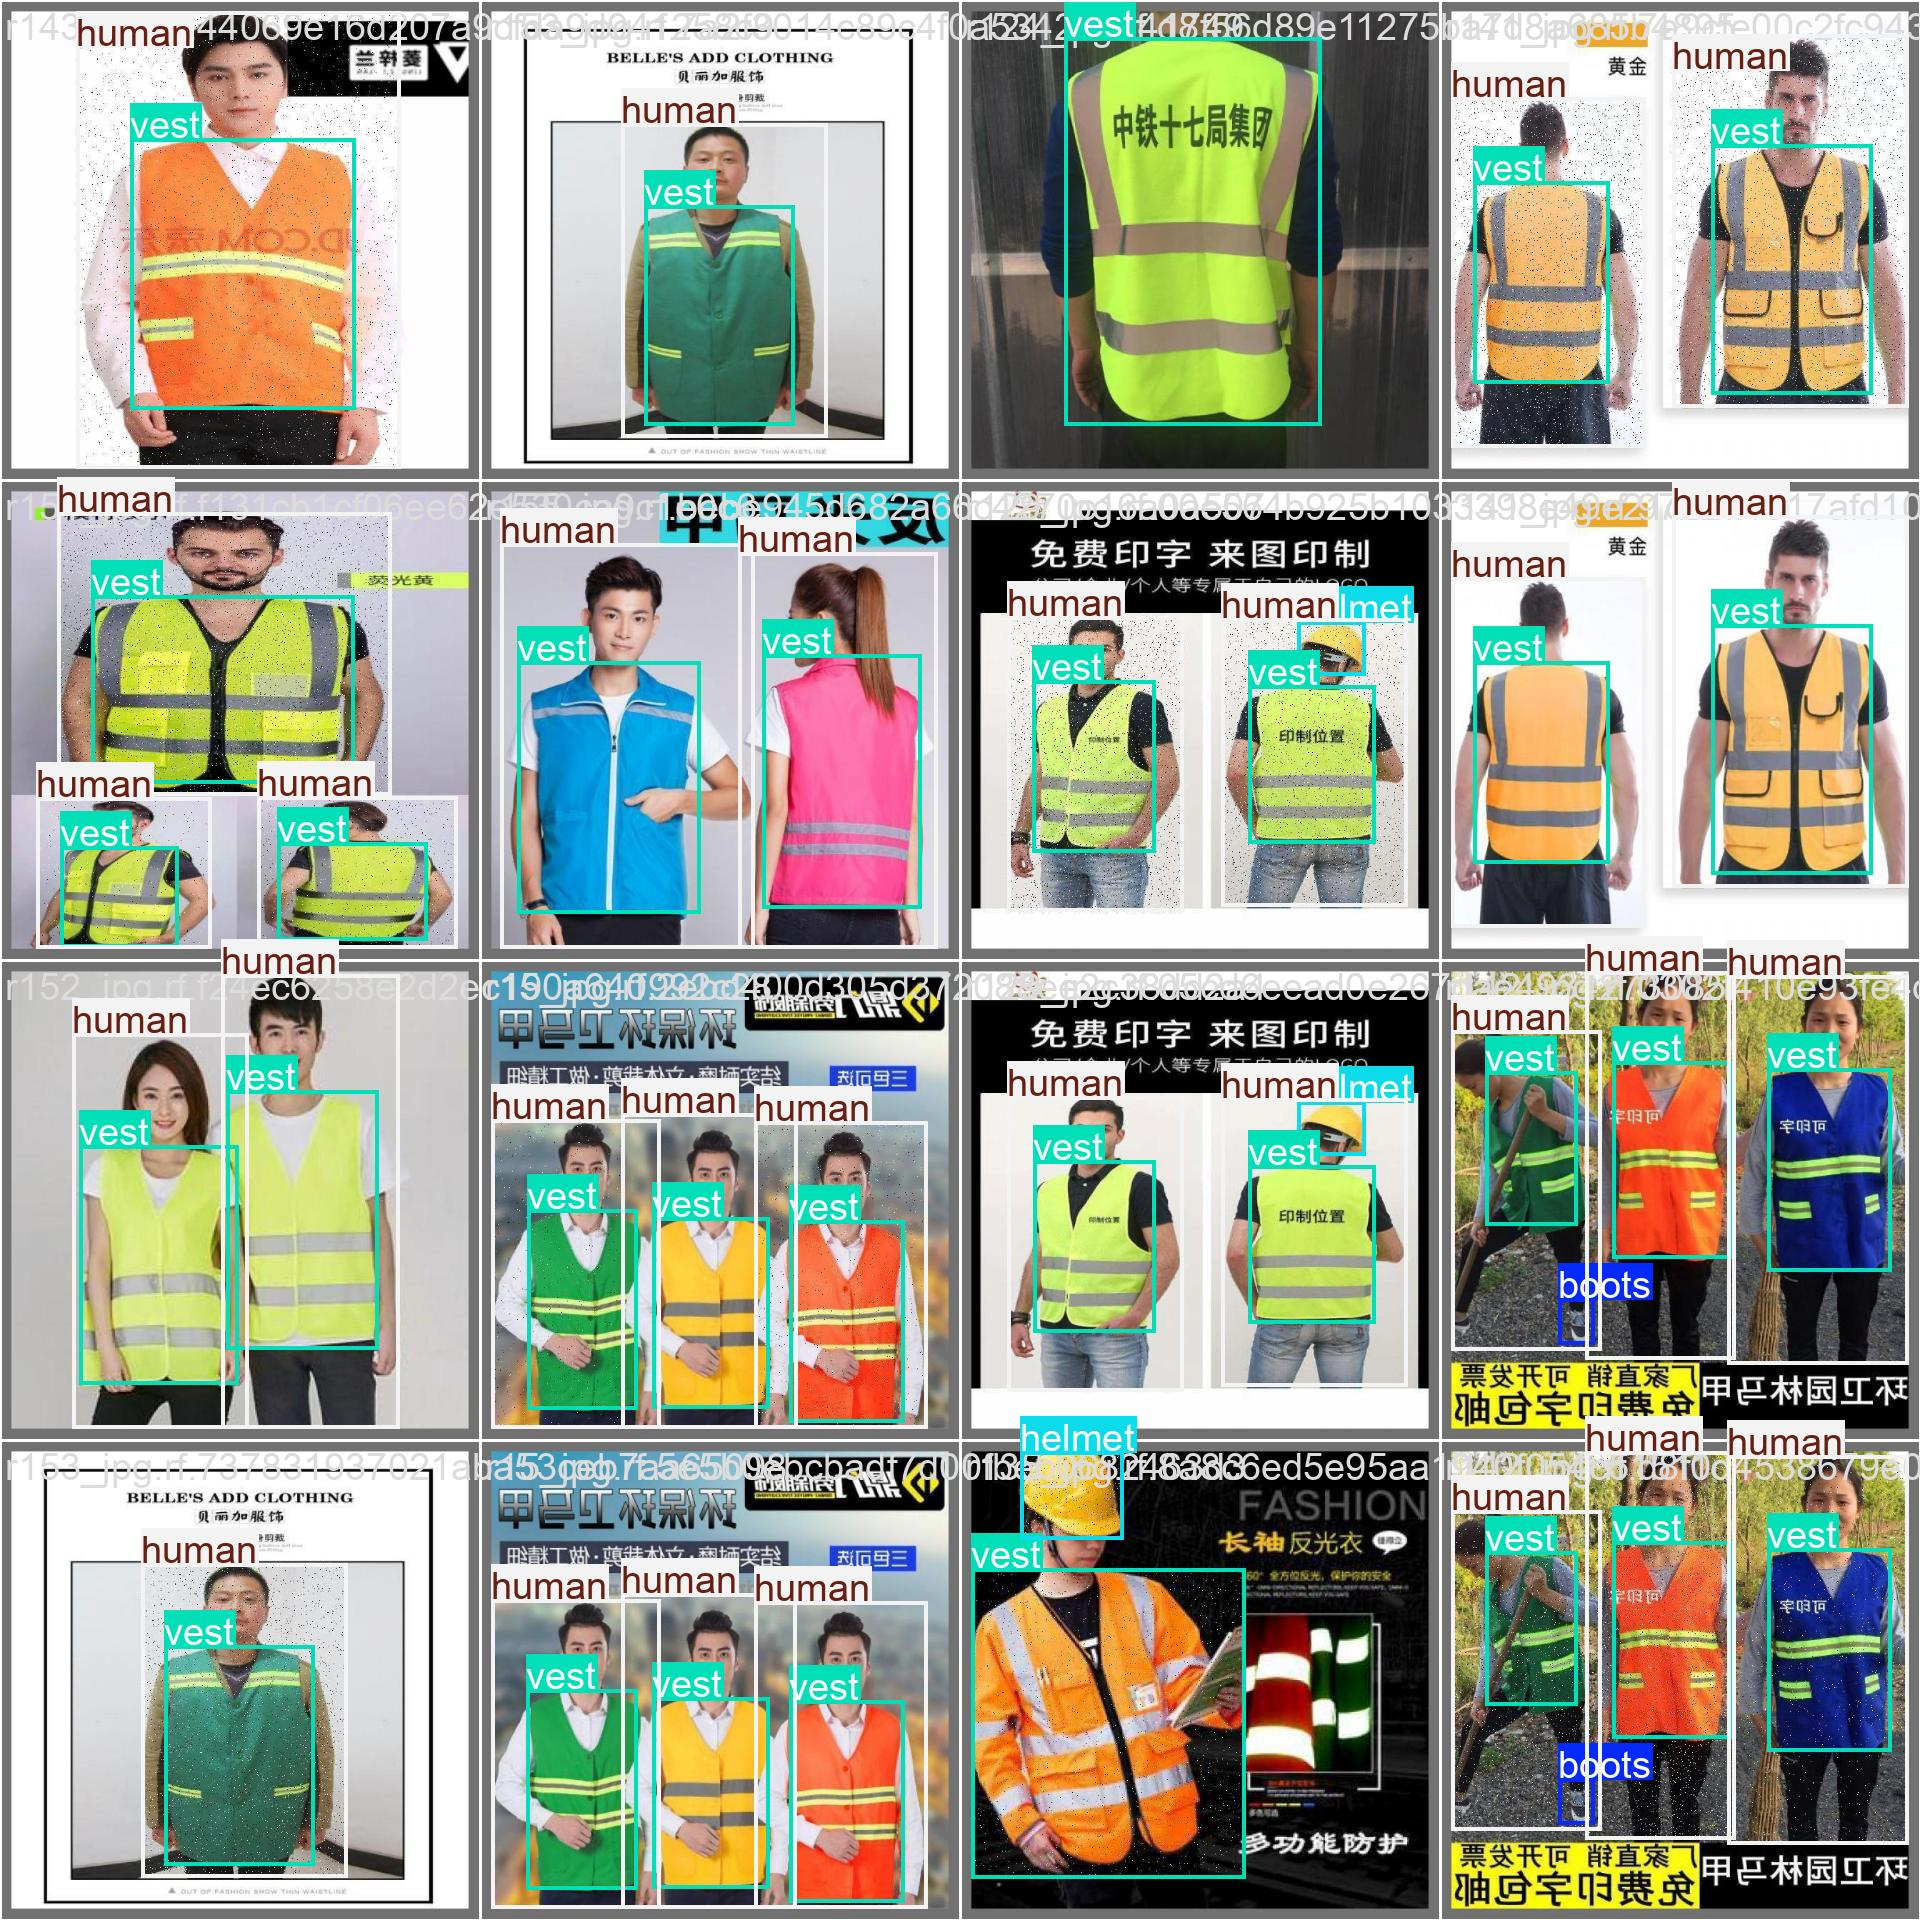

In [ ]:
Image(filename='/content/runs/detect/train3/val_batch0_labels.jpg', width=600)

```
train 과정중에 loss, accuracy 등의 graph 데이터는 runs/detect/train/ 에 있는 results.csv 와 results.png 통해서 확인가능하다
```

# Custom Model Inference Test

In [ ]:
!rm -rf /content/runs/detect/predict

In [ ]:
# model = YOLO('/content/runs/detect/train3/weights/best.pt')
model = YOLO('/content/runs/detect/train3/weights/best.pt')


In [ ]:
print(type(model.names), len(model.names))

print(model.names)

<class 'dict'> 4
{0: 'boots', 1: 'helmet', 2: 'human', 3: 'vest'}


# 테스트 이미지 데이터 생성 및 확인

In [ ]:
# 테스트 이미지

from glob import glob

test_image_list = glob('/content/dataset/test/images/*')

print(len(test_image_list))

test_image_list.sort()

for i in range(len(test_image_list)):

    print('i = ',i, test_image_list[i])

4
i =  0 /content/dataset/test/images/test_img_27.jpg
i =  1 /content/dataset/test/images/test_img_29.jpg
i =  2 /content/dataset/test/images/test_img_4.jpg
i =  3 /content/dataset/test/images/test_img_9.jpg


# 이미지내의 객체 검출 (Inference)

In [ ]:
results = model.predict(source='/content/dataset/PPE_Detection.v1i.yolov8/train/images', save=True, conf=0.1)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1467 /content/dataset/PPE_Detection.v1i.yolov8/train/images/00000383_jpg.rf.0534b453b362e74f6f8aed1946feea68.jpg: 640x640 7 bootss, 2 helmets, 2 humans, 2 vests, 7.4ms
image 2/1467 /content/dataset/PPE_Detection.v1i.yolov8/train/images/00004_jpg.rf.0ace1e0cccb500d3ff4dba7f7d5bcd75.jpg: 640x640 1 vest, 7.5ms
image 3/1467 /content/dataset/PPE_Detection.v1i.yolov8/train/images/00011_jpg.rf.e0b6876a63730188aab1a4a0b7ec900b.jpg: 640x640 1 helmet, 3 

In [ ]:
print(type(results), len(results))

<class 'list'> 1467


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image_paths = glob('/content/runs/detect/predict/*.jpg')

for image_path in image_paths:
    img = cv2.imread(image_path)
    cv2_imshow(img)

NameError: name 'glob' is not defined

# 다운로드

In [ ]:
from google.colab import files

# 다운로드할 파일 경로
files.download('/content/runs/detect/train3/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>